In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import tensorflow as tf

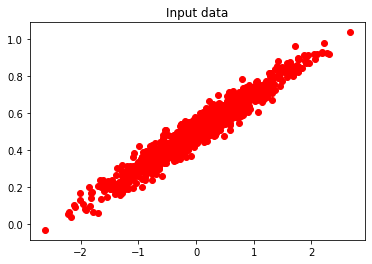

In [5]:
# Define the number of points to generate 
num_points = 1200
# Generate the data based on equation y = mx + c 
data = [] 
m = 0.2 
c = 0.5 
for i in range(num_points): 
    # Generate 'x' 
    x = np.random.normal(0.0, 0.8)
    # Generate some noise 
    noise = np.random.normal(0.0, 0.04)
    # Compute 'y' 
    y = m*x + c + noise 
    data.append([x, y])

# Separate x and y 
x_data = [d[0] for d in data] 
y_data = [d[1] for d in data]

# Plot the generated data 
plt.plot(x_data, y_data, 'ro') 
plt.title('Input data') 
plt.show()

In [6]:
# Generate weights and biases 
W = tf.Variable(tf.random_uniform([1], -1.0, 1.0)) 
b = tf.Variable(tf.zeros([1]))

# Define equation for 'y' 
y = W * x_data + b
# Define how to compute the loss 
loss = tf.reduce_mean(tf.square(y - y_data))
# Define the gradient descent optimizer 
optimizer = tf.train.GradientDescentOptimizer(0.5) 
train = optimizer.minimize(loss)
# Initialize all the variables 
init = tf.global_variables_initializer()
# Start the tensorflow session and run it 
sess = tf.Session() 
sess.run(init)

ITERATION 1
W = 0.29526585
b = 0.49661458
loss = 0.0073943217
ITERATION 2
W = 0.2338436
b = 0.49867108
loss = 0.0022865352
ITERATION 3
W = 0.21220325
b = 0.49948108
loss = 0.0016523262
ITERATION 4
W = 0.20457779
b = 0.49976647
loss = 0.0015735788
ITERATION 5
W = 0.20189078
b = 0.49986702
loss = 0.0015638011
ITERATION 6
W = 0.20094396
b = 0.49990246
loss = 0.0015625868
ITERATION 7
W = 0.20061032
b = 0.49991494
loss = 0.001562436
ITERATION 8
W = 0.20049275
b = 0.49991935
loss = 0.0015624173
ITERATION 9
W = 0.20045133
b = 0.4999209
loss = 0.0015624154
ITERATION 10
W = 0.20043674
b = 0.49992144
loss = 0.0015624145


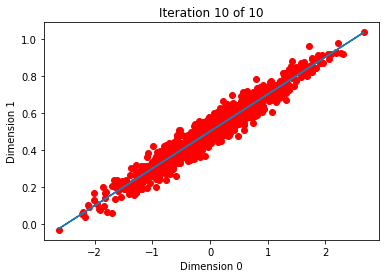

In [7]:
# Start iterating 
num_iterations = 10 
for step in range(num_iterations): 
    # Run the session 
    sess.run(train)
    # Print the progress 
    print('ITERATION', step+1) 
    print('W =', sess.run(W)[0]) 
    print('b =', sess.run(b)[0]) 
    print('loss =', sess.run(loss))

    
# Plot the input data 
plt.plot(x_data, y_data, 'ro') 
# Plot the predicted output line 
plt.plot(x_data, sess.run(W) * x_data + sess.run(b))

# Set plotting parameters 
plt.xlabel('Dimension 0') 
plt.ylabel('Dimension 1') 
plt.title('Iteration ' + str(step+1) + ' of ' + str(num_iterations)) 
plt.show()


如何使用TensorFlow创建单层神经网络，并使用它来构建图像分类器？使用MNIST图像数据集来构建系统。它是包含手写的数字图像的数据集。其目标是构建一个能够正确识别每个图像中数字的分类器。

In [ ]:
import argparse 
import tensorflow as tf 
from tensorflow.examples.tutorials.mnist import input_data

In [ ]:
def build_arg_parser():
    parser = argparse.ArgumentParser(description='Build a classifier using MNIST data')
    parser.add_argument('--input_dir', dest='input_dir', type=str, default='./mnist_data', help='Directory for storing data')
    return parser

In [ ]:
if __name__ == '__main__':
    args = build_arg_parser().parse_args()

In [ ]:
mnist = input_data.read_data_sets(args.input_dir, one_hot=True)

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

# 导入TensorFlow和tf.keras
import tensorflow as tf
from tensorflow import keras

# 导入辅助库
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [2]:
import torch
torch.cuda.is_available()

False

In [3]:
import torch
t_cpu = torch.rand(500,500,500)
%timeit t_cpu @ t_cpu

1.39 s ± 42.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [4]:
t_gpu = torch.rand(500,500,500).cuda()
%timeit t_gpu @ t_gpu

AssertionError: 
Found no NVIDIA driver on your system. Please check that you
have an NVIDIA GPU and installed a driver from
http://www.nvidia.com/Download/index.aspx